In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\kaile\Downloads\2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


# Q1

In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


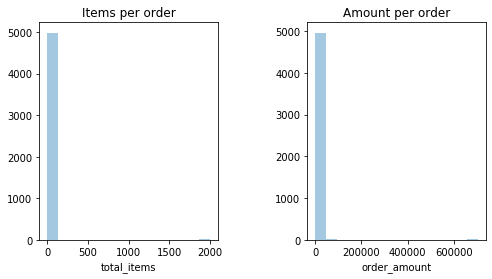

In [5]:
fig = plt.figure(figsize = (8, 4))
ax1 = plt.subplot(121)
sns.distplot(df['total_items'], kde = False, bins = 15)
ax1.set_title("Items per order")
ax2 = plt.subplot(122)
sns.distplot(df['order_amount'], kde = False, bins = 15)
ax2.set_title("Amount per order")
plt.subplots_adjust(wspace=0.5)

**There exist some orders with very large values, which may account for the large AOV**

In [8]:
amount = sorted(df.order_amount)
print(amount[-100:])

[804, 804, 805, 805, 810, 815, 815, 816, 830, 830, 830, 845, 865, 865, 880, 880, 880, 885, 885, 890, 920, 935, 935, 935, 948, 960, 960, 965, 980, 1056, 1056, 1056, 1064, 1086, 1408, 1408, 1760, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 51450, 77175, 77175, 77175, 77175, 77175, 77175, 77175, 77175, 77175, 102900, 154350, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000]


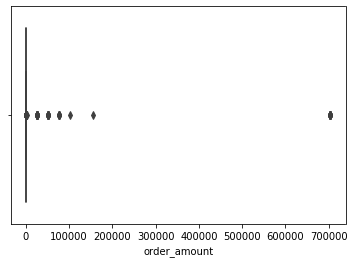

In [33]:
sns.boxplot(df.order_amount)

**The majority orders' total amouts are below 2000. However, there are some orders with very large amounts as outliers. The AOV in this case is not representing, influnced by these outliers.** 

In [10]:
df[df.drop(columns = ["order_id"]).duplicated()]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00


**There are 5 transactions exact same as other transactions with very big values. If more context were given, these could be further checked**

In [12]:
len(df.loc[df["order_amount"] == 704000])

17

In [19]:
print(df.loc[df["order_amount"] > 10000].shop_id.value_counts())
print(df.loc[(df["shop_id"] == 42) | (df["shop_id"] == 78)].shop_id.value_counts())

78    46
42    17
Name: shop_id, dtype: int64
42    51
78    46
Name: shop_id, dtype: int64


**The large-amount order were all from two shops, shop #78 and shop #42. All orders with 2000 sold items and 704000 values are from shop #42.**

In [24]:
df.loc[df["shop_id"] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


**Items in shop #78 have very high price, so even if the items sold were in small number, the amounts would be so high and the AOV will be also very high compared with other stores**

**To obtain a more representing AOV, one method could be calculating the AOV except for the orders from shop #78 and shop #42. In this case, we could eliminate the effects from big orders. The calculated AOV is** ***300***

In [27]:
new_df = df.loc[(df["shop_id"] != 78) & (df["shop_id"] != 42)]
new_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717
std,1444.221163,29.154367,86.887947,155.941112,0.982602
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000


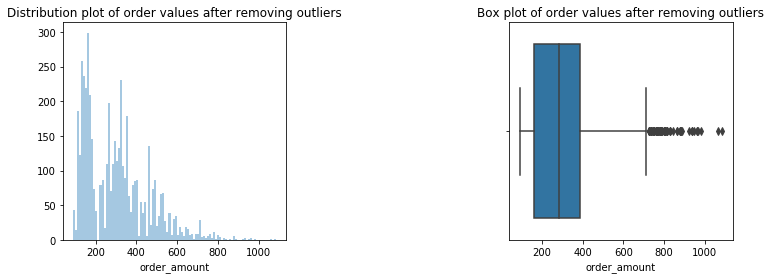

In [44]:
fig = plt.figure(figsize = (12, 4))
ax1 = plt.subplot(121)
sns.distplot(new_df.order_amount, kde = False, bins = 100)
ax1.set_title("Distribution plot of order values after removing outliers")
ax2= plt.subplot(122)
sns.boxplot(new_df.order_amount)
ax2.set_title("Box plot of order values after removing outliers")
plt.subplots_adjust(wspace=1)

# Q2

**AOV is greatly influenced by the ourliers(in this case the order of which amount is greated than 1760), making AOV high than normal. To remove the influence of outliers, the *median order value*, could be used as the metrics. Median is less sensitive to ouliers than mean**

# Q3

In [48]:
new_df.order_amount.median()

284.0